**Zastosowanie kilku modeli na zbiór, podział danych i metryki**

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=RuntimeWarning)  
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()


Wypisanie wszystkich składowych z otrzymanego zbioru:

In [ ]:
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


Zobaczmy składową `DESCR`:

In [ ]:
#print(data.DESCR)
data['DESCR']

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

Jest to zbiór przeznaczony do binarnej klasyfikacji rzeczywistych danych liczbowych.
Wypisanie nazwy cech (`feature_names`) i klas (`target_names`):

In [ ]:
print(data.feature_names)
print(data.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


Wypisanie rozmiarów tablic danych (`data`) i klas (`target`):

In [ ]:
print(data.feature_names.shape)
print(data.target_names.shape)

(30,)
(2,)


## Podział danych

Podzielenie danych na zbiór treningowy (90%) i zbiór testowy(10%).

In [ ]:
from sklearn.model_selection import train_test_split


x, y = data.data, data.target
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.1,stratify=y)

Wczytanie modeli

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

Uruchomienie modeli

In [ ]:
models = [
          ('LR', LinearRegression()), 
          ('Gauss', GaussianProcessClassifier()),
          ('GNB', GaussianNB()),
          ('KNN', KNeighborsClassifier()),
          ('SVC', SVC()), 
          ('SGD', SGDClassifier()),
          ('mlp', MLPClassifier())
        ]

for name, model in models:
  clf = model.fit(X_train, Y_train)
  y_pred = clf.predict(X_test)
  print(name)
  print(clf.score(X_test, Y_test))


LR
0.7580810389574821
Gauss
0.8771929824561403
GNB
0.9649122807017544
KNN
0.9298245614035088
SVC
0.8596491228070176
SGD
0.8771929824561403
mlp
0.9473684210526315


## Walidacja krzyżowa

Przy niewielkim zbiorze danych, ciężko jest wydzielić reprezentatywny zbiór testowy. Jeden ze sposobów jest uruchomić cały proces kilka razy i raportować średnie i odchylenia uzyskanych wyników.

Lepszym sposobem jest podzielić cały zbiór danych na `K` paczek i iteracyjnie użyć każdej paczki jako dane testowe, a wszystkie inne (w każdej iteracji) jako dane treningowe.

In [ ]:
import statistics
import numpy as np

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(x, y)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.1,stratify=y)

for name, model in models:
  scores = []
  for train_index, test_index in skf.split(x, y):
     
     X_train, X_test = x[train_index], x[test_index]
     y_train, y_test = y[train_index], y[test_index]
     
     clf = model.fit(x[train_index], y[train_index])
     y_pred = clf.predict(x[test_index])
     score = clf.score(x[test_index], y[test_index])
     scores.append(score)

  print(name, 'score = ', np.mean(scores), ' standard deviation = ', np.std(scores))





LR score =  0.7408173313601685  standard deviation =  0.026821927488801814
Gauss score =  0.9068622884645242  standard deviation =  0.01965384908822661
GNB score =  0.9385188635305075  standard deviation =  0.014585994424363306
KNN score =  0.9279459711224964  standard deviation =  0.02176276406544814
SVC score =  0.9121720229777983  standard deviation =  0.03544367440584207
SGD score =  0.7786834342493402  standard deviation =  0.1275011903887213
mlp score =  0.9349479894426331  standard deviation =  0.012065751718388081


Naturalnym pytaniem jest jaką wartość wybrać dla parametru `K`. Im więcej paczek użyjemy, tym większa wariancja w wynikach. Dużo paczek oznacza mniejsze ryzyko biasu w eksperymentach, ale testy są robione na mniejszej ilości danych i przez to są bardziej chaotyczne. Mniej paczek oznacza bardziej dokładne wyniki testów, ale jest ryzyko że dane w ustalonych podziałach będa mniej reprezentatywne dla ogółu problemu. W skrajnym przypadku możemy użyć tyle paczek ile jest próbek - ta metoda nazywa się Leave-One-Out.

In [ ]:
from sklearn.model_selection import LeaveOneOut

x, y = data.data, data.target
loo = LeaveOneOut()
loo.get_n_splits(x)
model = SVC()
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.1,stratify=y)
k=1
for train_index, test_index in loo.split(x):
     print('K = ', k)
     k = k + 1
     X_train, X_test = x[train_index], x[test_index]
     y_train, y_test = y[train_index], y[test_index]
     clf = model.fit(x[train_index], y[train_index])
     y_pred = clf.predict(x[test_index])
     print(name, ' score = ', clf.score(x[test_index], y[test_index]))
     

K =  1
mlp  score =  1.0
K =  2
mlp  score =  1.0
K =  3
mlp  score =  1.0
K =  4
mlp  score =  0.0
K =  5
mlp  score =  1.0
K =  6
mlp  score =  0.0
K =  7
mlp  score =  1.0
K =  8
mlp  score =  1.0
K =  9
mlp  score =  0.0
K =  10
mlp  score =  0.0
K =  11
mlp  score =  1.0
K =  12
mlp  score =  1.0
K =  13
mlp  score =  1.0
K =  14
mlp  score =  0.0
K =  15
mlp  score =  0.0
K =  16
mlp  score =  1.0
K =  17
mlp  score =  1.0
K =  18
mlp  score =  1.0
K =  19
mlp  score =  1.0
K =  20
mlp  score =  1.0
K =  21
mlp  score =  1.0
K =  22
mlp  score =  1.0
K =  23
mlp  score =  1.0
K =  24
mlp  score =  1.0
K =  25
mlp  score =  1.0
K =  26
mlp  score =  1.0
K =  27
mlp  score =  0.0
K =  28
mlp  score =  1.0
K =  29
mlp  score =  1.0
K =  30
mlp  score =  1.0
K =  31
mlp  score =  1.0
K =  32
mlp  score =  1.0
K =  33
mlp  score =  1.0
K =  34
mlp  score =  1.0
K =  35
mlp  score =  1.0
K =  36
mlp  score =  1.0
K =  37
mlp  score =  0.0
K =  38
mlp  score =  1.0
K =  39
mlp  score = 

Zastosowanie metody `fit` i `predict` na danych testowych oraz wypisanie parametrów `accuracy_score`, `precision`, `recall` oraz macierzy konfuzji.

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, precision_score, recall_score

x, y = data.data, data.target
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.1,stratify=y)

models = [
           
          ('Gauss', GaussianProcessClassifier()),
          ('GNB', GaussianNB()),
          ('KNN', KNeighborsClassifier()),
          ('SVC', SVC()), 
          ('SGD', SGDClassifier()),
          ('mlp', MLPClassifier())
        ]

for name, model in models:
  clf = model.fit(X_train, Y_train)
  Y_pred = clf.predict(X_test)
  print(name, ' score = ', accuracy_score(Y_test, Y_pred), ' precision = ', precision_score(Y_test, Y_pred), ' recall = ', recall_score(Y_test, Y_pred), ' confusion matrix:', confusion_matrix(Y_test, Y_pred))
  #print(precision_recall_fscore_support(Y_test, Y_pred))
  #print(classification_report(Y_test, Y_pred))
  

Gauss  score =  0.9298245614035088  precision =  0.9  recall =  1.0  confusion matrix: [[17  4]
 [ 0 36]]
GNB  score =  0.9473684210526315  precision =  0.9459459459459459  recall =  0.9722222222222222  confusion matrix: [[19  2]
 [ 1 35]]
KNN  score =  0.9298245614035088  precision =  0.9  recall =  1.0  confusion matrix: [[17  4]
 [ 0 36]]
SVC  score =  0.9122807017543859  precision =  0.8780487804878049  recall =  1.0  confusion matrix: [[16  5]
 [ 0 36]]
SGD  score =  0.9122807017543859  precision =  0.8974358974358975  recall =  0.9722222222222222  confusion matrix: [[17  4]
 [ 1 35]]
mlp  score =  0.9649122807017544  precision =  0.9473684210526315  recall =  1.0  confusion matrix: [[19  2]
 [ 0 36]]


**Krzywe ROC**

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


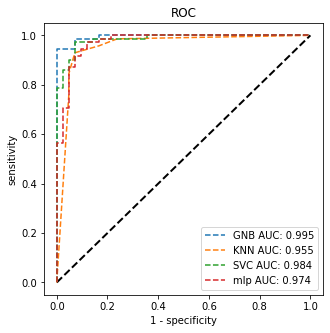

In [ ]:
figure(figsize=(5,5))
plot([0,1],[0,1],color='black',lw=2,linestyle='--')
xlabel('1 - specificity')
ylabel('sensitivity')
title('ROC')

models = [
           
          ('GNB', GaussianNB()),
          ('KNN', KNeighborsClassifier()),
          ('SVC', SVC(probability=True)), 
          #('SGD', SGDClassifier(loss='hinge',alpha='best_alpha',class_weight='balanced')),
          ('mlp', MLPClassifier())
        ]


from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(x, y)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.1,stratify=y)

for name, model in models:
  scores = []
  for train_index, test_index in skf.split(x, y):
     
     X_train, X_test = x[train_index], x[test_index]
     y_train, y_test = y[train_index], y[test_index]
     clf = model.fit(x[train_index], y[train_index])

  Y_proba = clf.predict_proba(X_test)
  Y_proba = Y_proba[:, 1]
  fpr, tpr, _ = roc_curve(y[test_index], Y_proba)
  auc = roc_auc_score(y[test_index], Y_proba)

  pyplot.plot(fpr, tpr, linestyle = '--', label = name + " AUC: " + str(round(auc, 3)))

legend(loc='lower right')

#Klasyfikacja wieloetykietowa

In [ ]:
from sklearn.datasets import load_wine
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize




data = load_wine()
x, y = data.data, data.target


models = [
          
          ('GNB', GaussianNB()),
          ('KNN', KNeighborsClassifier()),
          ('SVC', SVC(probability=True)), 
          #('SGD', SGDClassifier(loss='hinge',alpha='best_alpha',class_weight='balanced')),
          ('mlp', MLPClassifier())
         ]

skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(x, y)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.1,stratify=y)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

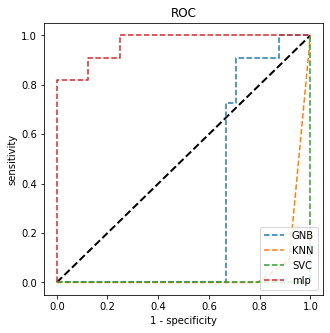

In [ ]:
figure(figsize=(5,5))
plot([0,1],[0,1],color='black',lw=2,linestyle='--')
xlabel('1 - specificity')
ylabel('sensitivity')
title('ROC')

for name, model in models:
  scores = []
  for train_index, test_index in skf.split(x, y):
     
     X_train, X_test = x[train_index], x[test_index]
     y_train, y_test = y[train_index], y[test_index]
     clf = OneVsRestClassifier(model).fit(x[train_index], y[train_index])

  y_proba = clf.predict_proba(X_test)
  y_pred = clf.predict(X_test)

  y_true_bin = label_binarize(y[test_index], classes=np.arange(2))
  y_pred_bin = label_binarize(y_pred, classes=np.arange(2))
  y_proba_rav = y_proba.ravel()
  y_pred_bin = y_pred_bin[:, 0]
  y_true_bin = y_true_bin[:, 0]
  y_proba = y_proba[:, 1]
  fpr, tpr, _ = roc_curve(y_true_bin, y_proba)
  auc = roc_auc_score(y[test_index], Y_proba, multi_class="ovr")



  pyplot.plot(fpr, tpr, linestyle = '--', label = name)

  #print(classification_report(Y_test, Y_pred))

legend(loc='lower right')


#Optymalizacja hiperparametru


In [ ]:
data = load_breast_cancer()

x, y = data.data, data.target

best_score = 0.0
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, stratify=y)
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X_train, y_train)


for train_index, dev_index in skf.split(X_train, y_train):
     
     X_train, X_dev = x[train_index], x[dev_index]
     y_train, y_dev = y[train_index], y[dev_index]

     for C in np.arange(0.2, 2.0, 0.2):
      model = SVC(kernel='rbf', C=C)
      model.fit(x[train_index], y[train_index])
      score = model.score(x[dev_index], y[dev_index])
      
      if score > best_score:
            best_score = score
            best_C = C
     

print('Highest Accuracy Score: ', best_score, "For C =", best_C)  


model = SVC(kernel='rbf', C=best_C)
model.fit(X_test, y_test)

print('Score on X_test: ', model.score(X_test,y_test))


Highest Accuracy Score:  0.9803921568627451 For C = 0.4
Score on X_test:  0.8947368421052632
